# Homework2 - Kernel Density Estimation and Parzen Window
### by Mehdi Lotfipour

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Here three different function are defined:

"mixpdf" that makes a dataset of "N" samples from some normal distribution with prior probabilities of "P" and means of "M" and covariance matrices of "S". Output is a dataset of size (N x (d+1)). "d" is dimension of feature vector. Last column is the index of distribution that coresponding record come from.

"parzen_window_gauss" which takes a "X" dataset for training, a user defined value of "h" and a vector "x" that we want to estimate the likelihood of. It estimates the pdf of distribution based on "X" dataset and return "p(x)".

"bayes_classifier_Par_win" function that recives two dataset, one for training and one for testing and a user defined value of "h" and returns a vector that show the predicted class of testing vectors in test dataset. It uses the Parzen window method for wstimating pdf of distribution and classify by Bayesian rule.

In [3]:
#make a dataset from a linear combination of 
#different gaussian distribution
def mixpdf(N, P, M, S):
    #inputs
    #N: number of data points
    #P: prior probability of distribution
    #M: means
    #S: covariances
    #output
    #return dataset: a dataset with N points from mixed pdf
    
    #helpful variables
    #d: dimension of features
    d = len(M[0])
    #class_labels: a list of possible classes
    class_labels = [class_label for class_label in range(len(P))]
    #labels: class of all records
    labels = np.random.choice(class_labels, size= N, p= P)
    #X: structure of dataset features init with zero
    X = np.zeros([N, d])
    for record in range(N):
        X[record] = np.random.multivariate_normal(M[labels[record]], S[labels[record]])
    
    #concatenating features and record labels to form a dataset
    dataset = np.concatenate((X, labels.reshape(-1, 1)), axis= 1)
    return dataset


#estimate the value of p(x) from observation "X" and "h" value
def parzen_window_gauss(X, h, x):
    #inputs
    #X: dataset
    #h: user defined parameter
    #x: feature vector thah we are interested in
    #output
    #return p_x: p(x) which is probability of occuring x
    
    #helpful variables
    #N: number of samples in dataset
    N = len(X)
    #d: dimension of features
    d = X.shape[1]
    #constant: used in Parzen window formula
    constant = N * (h ** d) * ((2 * np.pi) ** (d/2))
    
    #p_x: p(x)
    p_x = sum(np.exp(-np.sum(((X - x) ** 2), axis= 1) / (2 * (h ** 2))))
    p_x /= constant
    return p_x


#classify a dataset with bayes classifier
#and estimating likelihood of x with Parzen window
def bayes_classifier_Par_win(data_train, data_test, h):
    #inputs
    #data_train: a matrix of observation and their classes
        #we estimate the distribution from it
    #data_test: a matrix of feature vectors for classification
        #we classify based on estimated likelihood of observed data
    #h: user defined parameter
    #output
    #prediction: a vector of predicted class for test data
    
    #helpful variables
    #N_train: number of samples in train dataset
    N_train = len(data_train)
    #N_test: number of samples in test dataset
    N_test = len(data_test)
    #num_class: number of total classes
    num_class = np.unique(data_train[:, -1]).shape[0]
    #d: dimension of features
    d = data_train.shape[1] - 1
    #X_subclass[i] = data point of i'th class
    #prior[i] = p(Wi)
    X_subclass = []
    prior = []
    for i in range(num_class):
        X_subclass.append(data_train[data_train[:,-1] == i])
        prior.append(X_subclass[-1].shape[0] / N_train)

    #est_p_X[:,j] = estimated p(x|Wj)
    est_p_X = np.zeros([N_test, num_class])
    for j in range(num_class):
        for record in range(N_test):
            #we calculate p(x|Wj) by using Parzen window function
            est_p_X[record,j] = parzen_window_gauss(X_subclass[j][:, :-1], h, data_test[record])
    #p_w_x: p(Wj|x) = p(x|Wj) * Prior j
    p_w_x = est_p_X * prior
    #prediction is based on maximum of p(Wj|x)
    prediction = np.argmax(p_w_x, axis=1)
    #returning prediction vector
    return prediction

## Example 1.7.1

Here first we set the parameters and then make a datset of "X" based on them. Then we calculate the real pdf by its formula given in example text. After that we use "parzen_window_gauss" function to estimate the pdf in range of [-5, 5) of x axis. At the end we plot both real pdf and estimated pdf to compare them in one plot.

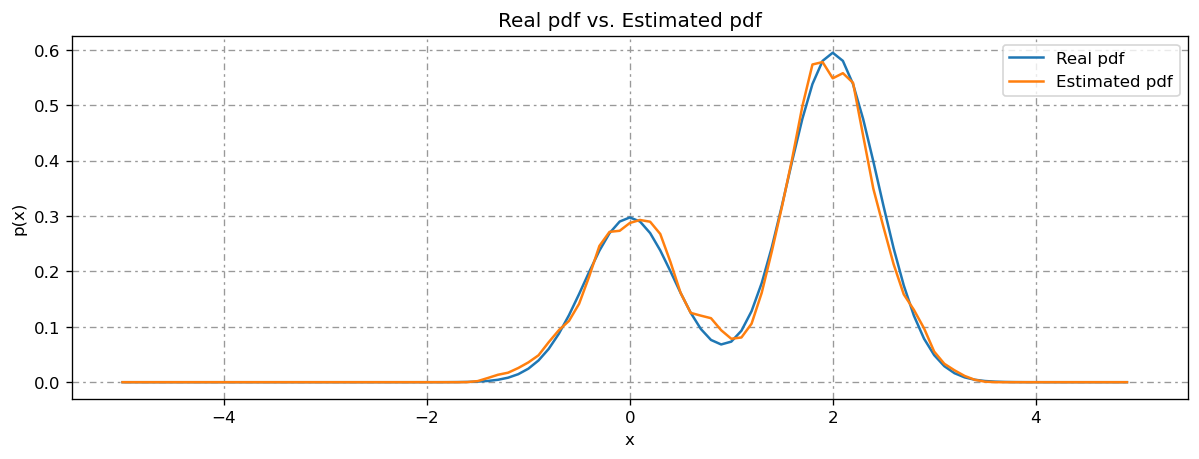

In [4]:
#parameters
#N: number of samples
N = 1000
#m_i: means of distribution
m_1 = [0]
m_2 = [2]
#s_i: covariances of distribution
s_1 = 0.2
s_2 = 0.2
#P: list of prior probability
P = [1/3, 2/3]
#M: list of means
M = [m_1, m_2]
#S: list of covariances
S = [[[s_1]], [[s_2]]]
#h: parameter of h
h = 0.1


#making dataset and axis of x
#X: pseudorandom generated dataset
X = mixpdf(N, P, M, S)
X = X[:, :-1]
#xx: axis of x in [-5, 5) with step of 0.1
xx = np.arange(-5, 5, 0.1)


#making real pdf from formula and estimated pdf from dataset
#pdf_x: real pdf of X applied on x axis
pdf_X = ((1/3) * (1 / np.sqrt(2 * np.pi * s_1)) * np.exp(-(xx ** 2) / (2 * s_1))
         + (2/3) * (1 / np.sqrt(2 * np.pi * s_2)) * np.exp(-((xx - 2) ** 2) / (2 * s_2)))
#est_pdf_X: estimated pdf of X applied on x axis
est_pdf_X = []
for i in range(len(xx)):
    est_pdf_X.append(parzen_window_gauss(X, h, x= xx[i]))
est_pdf_X = np.array(est_pdf_X).reshape(xx.shape)
    

#plotting real vs. estimated pdf
#plot structure
fig, ax = plt.subplots(dpi= 120, figsize= (12,4))
#pdf functions
ax.plot(xx, pdf_X, label= "Real pdf")
ax.plot(xx, est_pdf_X, label= "Estimated pdf")
#details
ax.set_xlim([-5.5, 5.5])
ax.set_title('Real pdf vs. Estimated pdf')
ax.set_xlabel('x')
ax.set_ylabel('p(x)')
ax.grid(True, color='0.6', dashes=(5, 3, 2, 3))
ax.legend(loc="best")

## Exercise 1.7.1

For this part we eant to show the effect of parameter "h" and number of samples in dataset "N". So we define two condition with different setup and perform previous example again and plot the result.

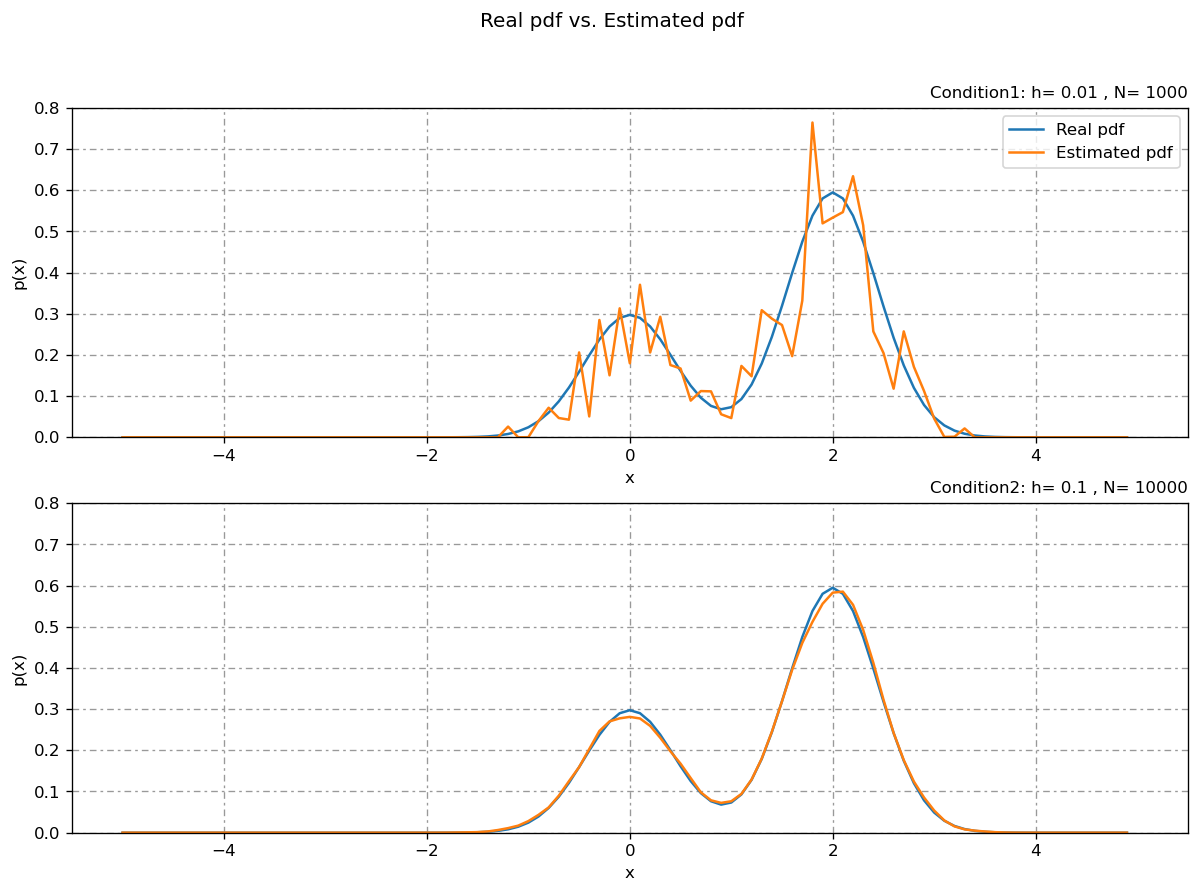

In [5]:
#parameters
#N: number of samples
N_cond1 = 1000
N_cond2 = 10000
#m_i: means of distribution
m_1 = [0]
m_2 = [2]
#s_i: covariances of distribution
s_1 = 0.2
s_2 = 0.2
#P: list of prior probability
P = [1/3, 2/3]
#M: list of means
M = [m_1, m_2]
#S: list of covariances
S = [[[s_1]], [[s_2]]]
#h: parameter of h
h_cond1 = 0.01
h_cond2 = 0.1


#making dataset and axis of x
#X: pseudorandom generated dataset
X_cond1 = mixpdf(N_cond1, P, M, S)
X_cond2 = mixpdf(N_cond2, P, M, S)
X_cond1 = X_cond1[:, :-1]
X_cond2 = X_cond2[:, :-1]
#xx: axis of x in [-5, 5) with step of 0.1
xx = np.arange(-5, 5, 0.1)


#making real pdf from formula and estimated pdf from dataset
#pdf_x: real pdf of X applied on x axis
pdf_X = ((1/3) * (1 / np.sqrt(2 * np.pi * s_1)) * np.exp(-(xx ** 2) / (2 * s_1))
         + (2/3) * (1 / np.sqrt(2 * np.pi * s_2)) * np.exp(-((xx - 2) ** 2) / (2 * s_2)))
#est_pdf_X: estimated pdf of X applied on x axis
est_pdf_X_cond1 = []
est_pdf_X_cond2 = []
for i in range(len(xx)):
    est_pdf_X_cond1.append(parzen_window_gauss(X_cond1, h_cond1, x= xx[i]))
    est_pdf_X_cond2.append(parzen_window_gauss(X_cond2, h_cond2, x= xx[i]))
est_pdf_X_cond1 = np.array(est_pdf_X_cond1).reshape(xx.shape)
est_pdf_X_cond2 = np.array(est_pdf_X_cond2).reshape(xx.shape)
    

#plotting real vs. estimated pdf
#plot structure
fig, ax = plt.subplots(2, 1, dpi= 120, figsize= (12,8))
#pdf functions
ax[0].plot(xx, pdf_X, label= "Real pdf")
ax[0].plot(xx, est_pdf_X_cond1, label= "Estimated pdf")
ax[1].plot(xx, pdf_X, label= "Real pdf")
ax[1].plot(xx, est_pdf_X_cond2, label= "Estimated pdf")
#details
fig.suptitle('Real pdf vs. Estimated pdf')
ax[0].set_xlim([-5.5, 5.5])
ax[1].set_xlim([-5.5, 5.5])
ax[0].set_ylim([0, 0.8])
ax[1].set_ylim([0, 0.8])
ax[0].set_title(f'Condition1: h= {h_cond1} , N= {N_cond1}', loc= 'right', fontsize=10)
ax[1].set_title(f'Condition2: h= {h_cond2} , N= {N_cond2}', loc= 'right', fontsize=10)
ax[0].set_xlabel('x')
ax[1].set_xlabel('x')
ax[0].set_ylabel('p(x)')
ax[1].set_ylabel('p(x)')
ax[0].grid(True, color='0.6', dashes=(5, 3, 2, 3))
ax[1].grid(True, color='0.6', dashes=(5, 3, 2, 3))
ax[0].legend(loc="best")

As we see the smaller value of "h" causes more noise and bigger value of "N" result in more exact estimation.

## Exercise 1.7.2

In this part we set a two dimensional dataset and estimate the pdf with Parzen window method. At the end we plot the real pdf and estimated pdf in two 3D plots.

Text(0.5, 0.92, 'Estimated pdf')

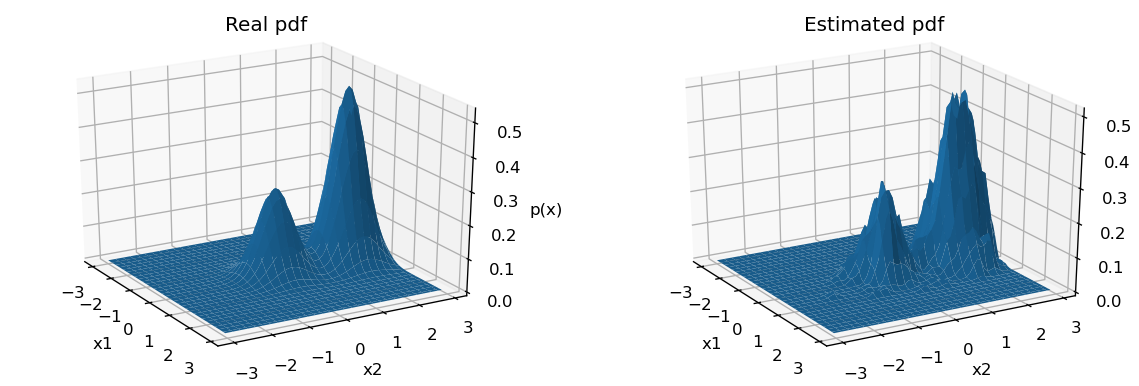

In [6]:
#parameters
#N: number of samples
N = 1000
#m_i: means of distribution
m_1 = [0, 0]
m_2 = [0, 2]
#s_i: covariances of distribution
s_1 = [[0.2, 0], [0, 0.2]]
s_2 = [[0.2, 0], [0, 0.2]]
#s: sigma used in pdf formula
s = 0.2
#P: list of prior probability
P = [1/3, 2/3]
#M: list of means
M = [m_1, m_2]
#S: list of covariances
S = [s_1, s_2]
#h: parameter of h
h= 0.1


#making dataset and plane of xy
#X: pseudorandom generated dataset
X = mixpdf(N, P, M, S)
X = X[:, :-1]
#xx: axis of x in [-3, 3) with step of 0.1
#yy: axis of y in [-3, 3) with step of 0.1
xx, yy = np.meshgrid(np.arange(-3, 3, 0.1),
                     np.arange(-3, 3, 0.1))
#grid_data: grid space coordinates of xy plane in a linear form
grid_data = np.c_[xx.ravel(), yy.ravel()]


#making real pdf from formula and estimated pdf from dataset
#pdf_x: real pdf of X applied on xy plane
pdf_X = ((1/3) * (1 / (2 * np.pi * s)) * np.exp(-(grid_data[:,0] ** 2 + grid_data[:,1] ** 2) / (2 * s))
         + (2/3) * (1 / (2 * np.pi * s)) * np.exp(-(grid_data[:,0] ** 2 + (grid_data[:,1] - 2) ** 2) / (2 * s))).reshape(xx.shape)
#est_pdf_X: estimated pdf of X applied on xy plan
est_pdf_X = []
for i in range(len(grid_data)):
    est_pdf_X.append(parzen_window_gauss(X, h, x= grid_data[i]))
est_pdf_X = np.array(est_pdf_X).reshape(xx.shape)


#plotting real vs. estimated pdf
#plot structure
fig, ax = plt.subplots(1, 2, subplot_kw={"projection": "3d"}, dpi= 120, figsize= (12,4))
ax[0].view_init(25, -30)
ax[1].view_init(25, -30)
#pdf functions
ax[0].plot_surface(xx, yy, pdf_X, rstride=2, cstride=2)
ax[1].plot_surface(xx, yy, est_pdf_X, rstride=2, cstride=2)
#details
ax[0].set_xlabel('x1')
ax[1].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[1].set_ylabel('x2')
ax[0].set_zlabel('p(x)')
ax[0].set_title('Real pdf')
ax[1].set_title('Estimated pdf')

## Exercise 1.7.3

In this part we set two dataset with three dimensional features from three equiprobable classes. One of them is used for training dataset and another one is used to test our classifier on. Our classifier is a Bayesian classifier and estimate the pdf from training dataset with Parzen window method. At the end we get an Error rate that is related to parameter "h". We want to see how "h" changes the Error rate. So we setup some initial "h" values and perform the classification task with different values of "h" and gather the Error rate in a list. Finally we plot Error rate vs. "h" values.

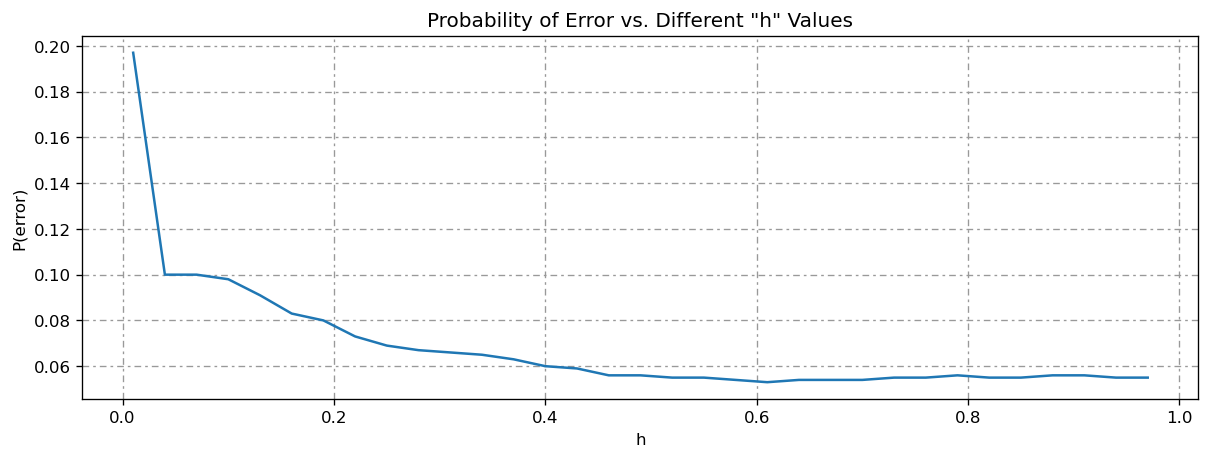

In [7]:
#parameters
#N: number of samples
N = 1000
#m_i: means of distribution
m_1 = [0, 0, 0]
m_2 = [1, 2, 2]
m_3 = [3, 3, 4]
#s_i: covariances of distribution
s_1 = [[0.8, 0, 0], [0, 0.8, 0], [0, 0, 0.8]]
s_2 = [[0.8, 0, 0], [0, 0.8, 0], [0, 0, 0.8]]
s_3 = [[0.8, 0, 0], [0, 0.8, 0], [0, 0, 0.8]]
#P: list of prior probability
P = [1/3, 1/3, 1/3]
#M: list of means
M = [m_1, m_2, m_3]
#S: list of covariances
S = [s_1, s_2, s_3]
h_values = np.arange(0.01,1,0.03)

#making datasets
#X_train: pseudorandom generated dataset for train
X_train = mixpdf(N, P, M, S)
#X_test: pseudorandom generated dataset for test
X_test = mixpdf(N, P, M, S)

#p_error[i] = p(error) of classifier with i'th value of h
p_error = []
for h in h_values:
    prediction = bayes_classifier_Par_win(X_train, X_test[:, :-1], h)
    err = sum(prediction != X_test[:,-1]) / X_test.shape[0]
    p_error.append(err)
    
#plotting p(error) vs. h
#plot structure
fig, ax = plt.subplots(dpi= 120, figsize= (12,4))
#p(error)
ax.plot(h_values, p_error)
#details
ax.set_title('Probability of Error vs. Different "h" Values')
ax.set_xlabel('h')
ax.set_ylabel('P(error)')
ax.grid(True, color='0.6', dashes=(5, 3, 2, 3))

As we see the best value of "h" is about 0.6 that minimizes our classification task.